In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
x = data.drop(['Annual Income (k$)','Spending Score (1-100)'],axis=1)

In [7]:
x

,CustomerID,Gender,Age
0,1,Male,19
1,2,Male,21
2,3,Female,20
3,4,Female,23
4,5,Female,31
...,...,...,...
195,196,Female,35
196,197,Female,45
197,198,Male,32
198,199,Male,32


In [11]:
x = x.drop('CustomerID',axis=1)

In [12]:
x

,Gender,Age
0,Male,19
1,Male,21
2,Female,20
3,Female,23
4,Female,31
...,...,...
195,Female,35
196,Female,45
197,Male,32
198,Male,32


In [17]:
x['Gender'] = pd.Categorical(x['Gender'])
x['Gender'] = x['Gender'].cat.codes

In [18]:
x

,Gender,Age
0,1,19
1,1,21
2,0,20
3,0,23
4,0,31
...,...,...
195,0,35
196,0,45
197,1,32
198,1,32


In [51]:
db = DBSCAN(eps=1,min_samples=5,metric='euclidean')

In [52]:
result = db.fit_predict(x)

In [53]:
result

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  3,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  3,  0,  2,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  3,  0,  0,  0,  1,  0,  2, -1,  0,  1,  2, -1,  0,  0,  1,
        0,  0, -1,  0,  3,  3,  3,  0,  0,  0,  0,  0,  3,  0,  1,  0,  0,
        0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  1,  2,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  3,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

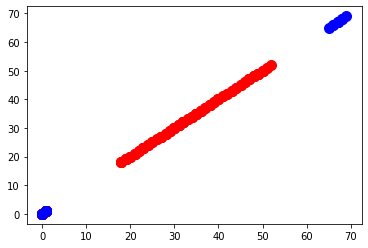

In [54]:
plt.scatter(x[db.fit_predict(x)==0],x[db.fit_predict(x) ==0],s = 100, c = 'red')
plt.scatter(x[db.fit_predict(x)==1],x[db.fit_predict(x) ==1],s = 100, c = 'blue')